In [16]:
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("sijovm/atpdata")

MATCHES_DATA_FILE_NAME = "atp_matches_till_2022.csv"
PLAYERS_DATA_FILE_NAME = "atp_players_till_2022.csv"
RANKINGS_DATA_FILE_NAME = "atp_rankings_till_2022.csv"

matches_data = pd.read_csv(f'{path}/{MATCHES_DATA_FILE_NAME}')
players_data = pd.read_csv(f'{path}/{PLAYERS_DATA_FILE_NAME}')
rankings_data = pd.read_csv(f'{path}/{RANKINGS_DATA_FILE_NAME}')
rankings_data['ranking_date'] = pd.to_datetime(rankings_data['ranking_date'], format='%Y%m%d')

print(f"ranking data: {rankings_data['ranking_date']}")

# Display the first few rows of each dataset
print("Matches Data:")
print(matches_data.head())
print("\nPlayers Data:")
print(players_data.head())
print("\nRankings Data:")
print(rankings_data.head())

print(f"Rankings Data Shape: {rankings_data.shape}")

ranking data: 0         2010-01-04
1         2010-01-04
2         2010-01-04
3         2010-01-04
4         2010-01-04
             ...    
3113256   2009-12-28
3113257   2009-12-28
3113258   2009-12-28
3113259   2009-12-28
3113260   2009-12-28
Name: ranking_date, Length: 3113261, dtype: datetime64[ns]
Matches Data:
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  1968-2029       Dublin   Grass         32             A      19680708   
1  1968-2029       Dublin   Grass         32             A      19680708   
2  1968-2029       Dublin   Grass         32             A      19680708   
3  1968-2029       Dublin   Grass         32             A      19680708   
4  1968-2029       Dublin   Grass         32             A      19680708   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        270     112411          NaN          NaN  ...     NaN      NaN   
1        271     126914          NaN          NaN  ...     NaN      NaN   


In [9]:
# print(rankings_data['ranking_date'].unique())

print(f"Matches Data cols: {matches_data.columns}")
print(f"Players Data cols: {players_data.columns}")
print(f"Rankings Data cols: {rankings_data.columns}")

Matches Data cols: Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')
Players Data cols: Index(['player_id', 'name_first', 'name_last', 'hand', 'dob', 'ioc', 'height',
       'wikidata_id'],
      dtype='object')
Rankings Data cols: Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')


## Top 10 players by ranking on 2016-01-01

In [17]:
# Verify the date conversion worked correctly
print("Sample of converted dates:")
sample_dates = rankings_data['ranking_date'].head(10).unique()
for date in sorted(sample_dates)[:5]:
    print(f"  {date.strftime('%Y-%m-%d (%A)')}")

# Filter for January 1st, 2016 (or closest available date)
target_date = pd.to_datetime('2016-01-01')

# Find the closest date to January 1st, 2016
date_differences = abs(rankings_data['ranking_date'] - target_date)
closest_date = rankings_data.loc[date_differences.idxmin(), 'ranking_date']

print(f"\nTarget date: {target_date.strftime('%Y-%m-%d')}")
print(f"Closest available date: {closest_date.strftime('%Y-%m-%d')}")

# Get rankings for the closest date
jan_2016_rankings = rankings_data[rankings_data['ranking_date'] == closest_date].copy()

# Sort by rank and get top 10
top_10_rankings = jan_2016_rankings.sort_values('rank').head(10)

# Merge with players data to get full names
players_info = players_data[['player_id', 'name_first', 'name_last', 'ioc', 'hand']].copy()
top_10_with_names = top_10_rankings.merge(
    players_info,
    left_on='player',
    right_on='player_id',
    how='left'
)

# Create full name column
top_10_with_names['full_name'] = top_10_with_names['name_first'] + ' ' + top_10_with_names['name_last']

# Display results
print(f"\n=== TOP 10 ATP PLAYERS ON {closest_date.strftime('%Y-%m-%d')} ===")
print("-" * 80)

for idx, row in top_10_with_names.iterrows():
    rank = int(row['rank'])
    name = row['full_name']
    points = int(row['points']) if pd.notna(row['points']) else 'N/A'
    country = row['ioc'] if pd.notna(row['ioc']) else 'N/A'
    hand = row['hand'] if pd.notna(row['hand']) else 'N/A'

    print(f"{rank:2d}. {name:<25} | {country:3s} | {hand:1s} | {points:>6} pts")

print("-" * 80)

# Additional analysis: Show 2016 ranking dates to understand the schedule
print(f"\nRanking dates in early 2016:")
early_2016_dates = rankings_data[
    (rankings_data['ranking_date'] >= pd.to_datetime('2015-12-20')) &
    (rankings_data['ranking_date'] <= pd.to_datetime('2016-02-15'))
]['ranking_date'].unique()

for date in sorted(early_2016_dates):
    day_of_week = date.strftime('%A')
    print(f"  {date.strftime('%Y-%m-%d')} ({day_of_week})")
    if len([d for d in sorted(early_2016_dates) if d <= date]) >= 10:  # Limit output
        print("  ... (and more)")
        break

# Save the top 10 for potential use in web visualization
output_data = top_10_with_names[['rank', 'full_name', 'points', 'ioc', 'hand', 'player_id']].copy()
output_data.to_csv('top_10_players_jan_2016.csv', index=False)
print(f"\nTop 10 players data saved to 'top_10_players_jan_2016.csv'")

# Quick rivalry analysis setup for scrollytelling
print(f"\n=== POTENTIAL RIVALRIES FOR SCROLLYTELLING ===")
print("Top combinations for rivalry analysis:")

# Get top 6 players for rivalry combinations
top_6_names = top_10_with_names.head(6)['full_name'].tolist()
for i in range(len(top_6_names)):
    for j in range(i+1, min(i+4, len(top_6_names))):  # Limit to avoid too many combinations
        print(f"- {top_6_names[i]} vs {top_6_names[j]}")

Sample of converted dates:
  2010-01-04 (Monday)

Target date: 2016-01-01
Closest available date: 2016-01-04

=== TOP 10 ATP PLAYERS ON 2016-01-04 ===
--------------------------------------------------------------------------------
 1. Novak Djokovic            | SRB | R |  16585 pts
 2. Andy Murray               | GBR | R |   8945 pts
 3. Roger Federer             | SUI | R |   8265 pts
 4. Stan Wawrinka             | SUI | R |   6865 pts
 5. Rafael Nadal              | ESP | L |   5230 pts
 6. Tomas Berdych             | CZE | R |   4620 pts
 7. David Ferrer              | ESP | R |   4305 pts
 8. Kei Nishikori             | JPN | R |   4235 pts
 9. Richard Gasquet           | FRA | R |   2850 pts
10. Jo-Wilfried Tsonga        | FRA | R |   2635 pts
--------------------------------------------------------------------------------

Ranking dates in early 2016:
  2015-12-21 (Monday)
  2015-12-28 (Monday)
  2016-01-04 (Monday)
  2016-01-11 (Monday)
  2016-01-18 (Monday)
  2016-02-01 (Mon

## Prepare data for scrollytelling

In [20]:
from datetime import datetime
import json

def prepare_scrollytelling_data(rankings_data, players_data, date_intervals=10):
    """
    Prepare tennis rankings data for scrollytelling visualization
    """

    # Convert ranking_date from YYYYMMDD format
    rankings_data['ranking_date'] = pd.to_datetime(rankings_data['ranking_date'], format='%Y%m%d')

    # Get date range
    start_date = rankings_data['ranking_date'].min()
    end_date = rankings_data['ranking_date'].max()

    print(f"Data range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

    # Select key dates for scrollytelling (every 6 months or yearly)
    date_range = pd.date_range(start=start_date, end=end_date, freq='6M')
    selected_dates = []

    for target_date in date_range:
        # Find closest actual ranking date
        date_diffs = abs(rankings_data['ranking_date'] - target_date)
        closest_date = rankings_data.loc[date_diffs.idxmin(), 'ranking_date']
        if closest_date not in selected_dates:
            selected_dates.append(closest_date)

    # Limit to reasonable number for scrollytelling
    selected_dates = selected_dates[:date_intervals]

    # Prepare players lookup
    players_lookup = players_data.set_index('player_id')[['name_first', 'name_last', 'ioc']].to_dict('index')

    scrollytelling_data = []

    for date in selected_dates:
        # Get top 10 rankings for this date
        date_rankings = rankings_data[rankings_data['ranking_date'] == date].sort_values('rank').head(10)

        rankings_list = []
        for _, row in date_rankings.iterrows():
            player_id = row['player']
            player_info = players_lookup.get(player_id, {})

            full_name = f"{player_info.get('name_first', '')} {player_info.get('name_last', '')}".strip()
            if not full_name:
                full_name = f"Player {player_id}"

            rankings_list.append({
                'rank': int(row['rank']),
                'name': full_name,
                'country': player_info.get('ioc', 'UNK'),
                'points': int(row['points']) if pd.notna(row['points']) else 0,
                'player_id': str(player_id)
            })

        scrollytelling_data.append({
            'date': date.strftime('%Y-%m-%d'),
            'rankings': rankings_list
        })

    return scrollytelling_data

# Generate the data
scrolly_data = prepare_scrollytelling_data(rankings_data, players_data)

# Save as JSON for web app
with open('tennis-scrollytelling/data/rankings.json', 'w') as f:
    json.dump(scrolly_data, f, indent=2)

print(f"✅ Generated {len(scrolly_data)} time points for scrollytelling")
print("📁 Saved to: tennis-scrollytelling/data/rankings.json")

# Preview the data structure
print("\n📊 Sample data structure:")
if scrolly_data:
    sample = scrolly_data[0]
    print(f"Date: {sample['date']}")
    print("Top 3 players:")
    for player in sample['rankings'][:3]:
        print(f"  {player['rank']}. {player['name']} ({player['country']}) - {player['points']:,} pts")

# Generate step content suggestions based on data
print("\n📝 Suggested story steps based on your data:")
for i, period in enumerate(scrolly_data):
    date_obj = datetime.strptime(period['date'], '%Y-%m-%d')
    top_player = period['rankings'][0]['name']
    print(f"Step {i+1}: {date_obj.strftime('%B %Y')} - {top_player} leads the rankings")

Data range: 1973-08-27 to 2022-12-26


C:\Users\sskap\AppData\Local\Temp\ipykernel_29560\3046448499.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='6M')


✅ Generated 10 time points for scrollytelling
📁 Saved to: tennis-scrollytelling/data/rankings.json

📊 Sample data structure:
Date: 1973-08-27
Top 3 players:
  1. Ilie Nastase (ROU) - 0 pts
  2. Manuel Orantes (ESP) - 0 pts
  3. Stan Smith (USA) - 0 pts

📝 Suggested story steps based on your data:
Step 1: August 1973 - Ilie Nastase leads the rankings
Step 2: March 1974 - Ilie Nastase leads the rankings
Step 3: September 1974 - Jimmy Connors leads the rankings
Step 4: March 1975 - Jimmy Connors leads the rankings
Step 5: June 1975 - Jimmy Connors leads the rankings
Step 6: December 1975 - Jimmy Connors leads the rankings
Step 7: June 1976 - Jimmy Connors leads the rankings
Step 8: February 1977 - Jimmy Connors leads the rankings
Step 9: August 1977 - Jimmy Connors leads the rankings
Step 10: February 1978 - Jimmy Connors leads the rankings



🏆 Analyzing #1 ranked players...
Found 2,187 records of #1 rankings
Missing points data: 611 records (27.9%)
Date range: 1973-08-27 to 2022-12-26

📊 Sample of #1 ranking data:
1973-08-27: Ilie Nastase         -    N/A pts
1973-09-17: Ilie Nastase         -    N/A pts
1973-10-01: Ilie Nastase         -    N/A pts
1973-10-15: Ilie Nastase         -    N/A pts
1973-11-05: Ilie Nastase         -    N/A pts
1973-11-26: Ilie Nastase         -    N/A pts
1973-12-17: Ilie Nastase         -    N/A pts
1974-03-04: Ilie Nastase         -    N/A pts
1974-04-22: Ilie Nastase         -    N/A pts
1974-05-06: Ilie Nastase         -    N/A pts

📈 Recent #1 rankings (last 10):
2022-10-24: Carlos Alcaraz       -   6730 pts
2022-10-31: Carlos Alcaraz       -   6730 pts
2022-11-07: Carlos Alcaraz       -   6820 pts
2022-11-14: Carlos Alcaraz       -   6820 pts
2022-11-21: Carlos Alcaraz       -   6820 pts
2022-11-28: Carlos Alcaraz       -   6820 pts
2022-12-05: Carlos Alcaraz       -   6820 pts
2022-12-

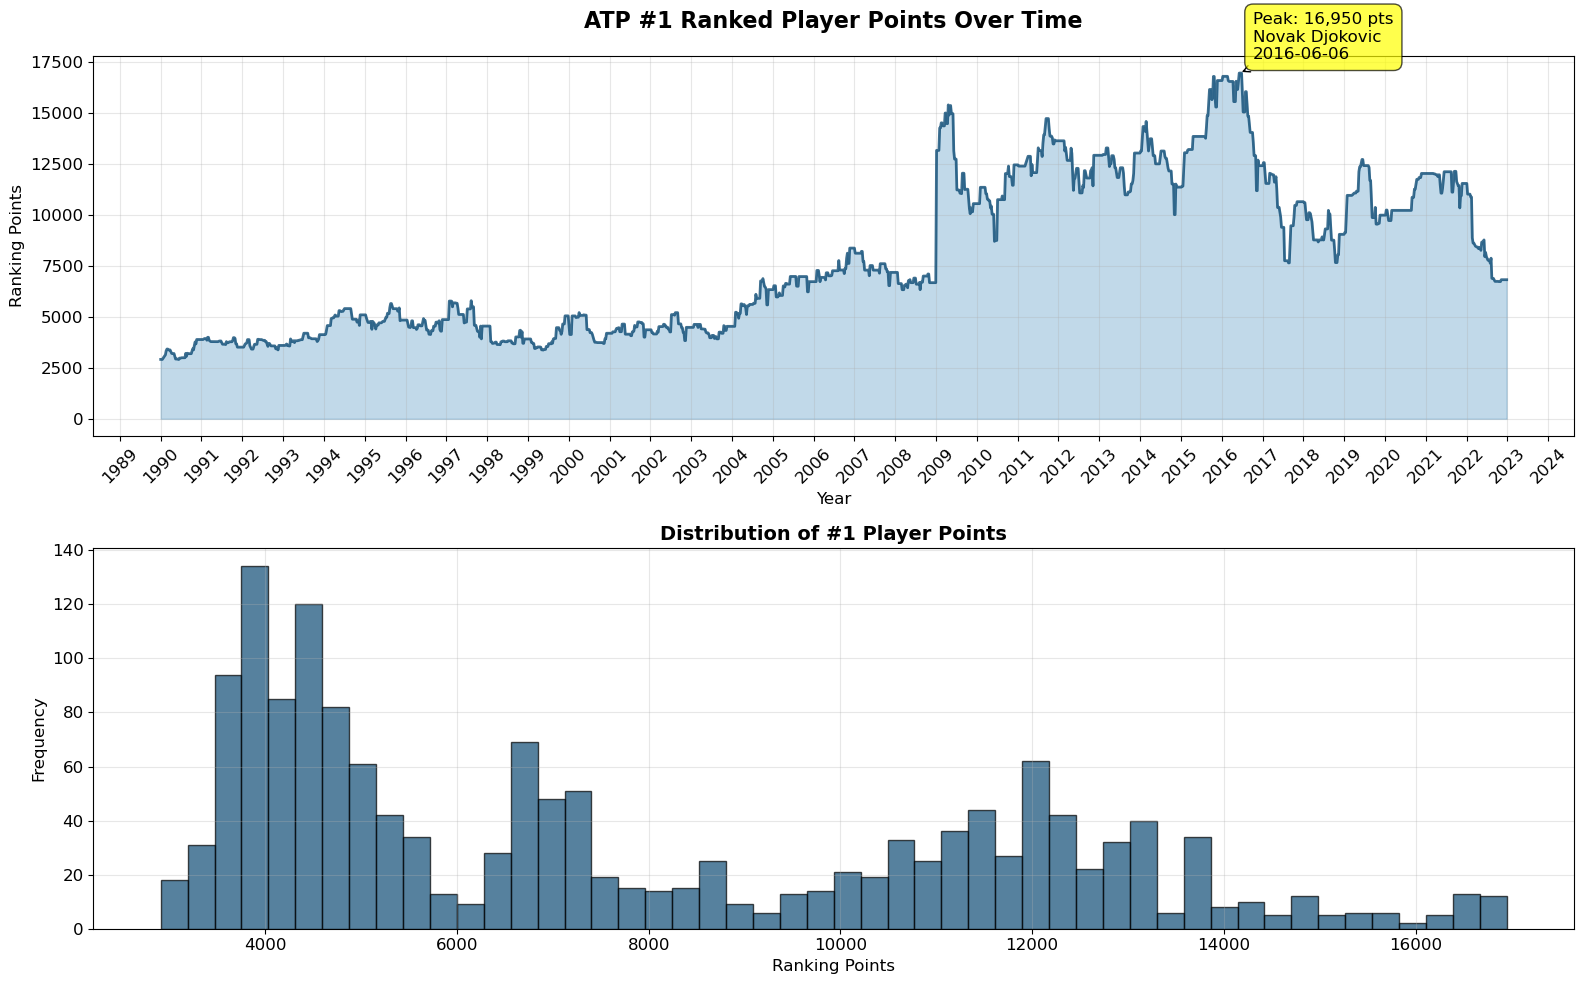


📊 SUMMARY STATISTICS
Total #1 ranking records: 2,187
Records with valid points: 1,576
Unique #1 players: 28

Points statistics:
  Minimum points: 2,909
  Maximum points: 16,950
  Average points: 7,741
  Median points:  6,725

🔍 CHECKING FOR DATA GAPS
Coverage by year (recent 10 years):
              Records  Avg_Points  Min_Points  Max_Points  \
ranking_date                                                
2013               46     12330.0     10980.0     13280.0   
2014               46     12608.0     10010.0     14580.0   
2015               46     14418.0     11360.0     16785.0   
2016               46     15026.0     11185.0     16950.0   
2017               47     10351.0      7645.0     12560.0   
2018               47      9114.0      7660.0     10645.0   
2019               47     10906.0      9135.0     12715.0   
2020               27     11013.0      9720.0     12030.0   
2021               46     11750.0     10340.0     12133.0   
2022               46      8027.0      67

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import kagglehub
from datetime import datetime
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12

# Create players lookup for names
players_lookup = players_data.set_index('player_id')[['name_first', 'name_last', 'ioc']].to_dict('index')

def get_player_name(player_id):
    """Get full player name from player_id"""
    player_info = players_lookup.get(player_id, {})
    first_name = player_info.get('name_first', '')
    last_name = player_info.get('name_last', '')
    full_name = f"{first_name} {last_name}".strip()
    return full_name if full_name else f"Player {player_id}"

# Filter for #1 ranked players
print("\n🏆 Analyzing #1 ranked players...")
rank_1_data = rankings_data[rankings_data['rank'] == 1].copy()
rank_1_data = rank_1_data.sort_values('ranking_date')

print(f"Found {len(rank_1_data):,} records of #1 rankings")

# Add player names
rank_1_data['player_name'] = rank_1_data['player'].apply(get_player_name)

# Check for missing points
missing_points = rank_1_data['points'].isna().sum()
print(f"Missing points data: {missing_points:,} records ({missing_points/len(rank_1_data)*100:.1f}%)")

# Data range
print(f"Date range: {rank_1_data['ranking_date'].min().strftime('%Y-%m-%d')} to {rank_1_data['ranking_date'].max().strftime('%Y-%m-%d')}")

# Sample of the data
print(f"\n📊 Sample of #1 ranking data:")
sample_data = rank_1_data.head(10)[['ranking_date', 'player_name', 'points']]
for _, row in sample_data.iterrows():
    date_str = row['ranking_date'].strftime('%Y-%m-%d')
    points = int(row['points']) if pd.notna(row['points']) else 'N/A'
    print(f"{date_str}: {row['player_name']:<20} - {points:>6} pts")

# Check recent data
print(f"\n📈 Recent #1 rankings (last 10):")
recent_data = rank_1_data.tail(10)[['ranking_date', 'player_name', 'points']]
for _, row in recent_data.iterrows():
    date_str = row['ranking_date'].strftime('%Y-%m-%d')
    points = int(row['points']) if pd.notna(row['points']) else 'N/A'
    print(f"{date_str}: {row['player_name']:<20} - {points:>6} pts")

# Create the plot
plt.figure(figsize=(16, 10))

# Plot 1: Points over time
plt.subplot(2, 1, 1)
# Remove records with missing points for plotting
valid_points_data = rank_1_data.dropna(subset=['points'])

plt.plot(valid_points_data['ranking_date'], valid_points_data['points'],
         linewidth=2, alpha=0.8, color='#0f4c75')
plt.fill_between(valid_points_data['ranking_date'], valid_points_data['points'],
                 alpha=0.3, color='#3282b8')

plt.title('ATP #1 Ranked Player Points Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ranking Points', fontsize=12)
plt.grid(True, alpha=0.3)

# Format x-axis to show years
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)
plt.xticks(rotation=45)

# Add some annotations for interesting periods
if len(valid_points_data) > 0:
    max_points_idx = valid_points_data['points'].idxmax()
    max_points_row = valid_points_data.loc[max_points_idx]
    plt.annotate(f'Peak: {int(max_points_row["points"]):,} pts\n{max_points_row["player_name"]}\n{max_points_row["ranking_date"].strftime("%Y-%m-%d")}',
                xy=(max_points_row['ranking_date'], max_points_row['points']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()

# Plot 2: Distribution of points
plt.subplot(2, 1, 2)
plt.hist(valid_points_data['points'], bins=50, alpha=0.7, color='#0f4c75', edgecolor='black')
plt.title('Distribution of #1 Player Points', fontsize=14, fontweight='bold')
plt.xlabel('Ranking Points', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📊 SUMMARY STATISTICS")
print("=" * 50)
print(f"Total #1 ranking records: {len(rank_1_data):,}")
print(f"Records with valid points: {len(valid_points_data):,}")
print(f"Unique #1 players: {rank_1_data['player_name'].nunique()}")

if len(valid_points_data) > 0:
    print(f"\nPoints statistics:")
    print(f"  Minimum points: {valid_points_data['points'].min():,.0f}")
    print(f"  Maximum points: {valid_points_data['points'].max():,.0f}")
    print(f"  Average points: {valid_points_data['points'].mean():,.0f}")
    print(f"  Median points:  {valid_points_data['points'].median():,.0f}")

# Check if there are years with missing points data
print(f"\n🔍 CHECKING FOR DATA GAPS")
print("=" * 50)

# Group by year to see coverage
yearly_coverage = valid_points_data.groupby(valid_points_data['ranking_date'].dt.year).agg({
    'points': ['count', 'mean', 'min', 'max'],
    'player_name': lambda x: ', '.join(x.unique())
}).round(0)

yearly_coverage.columns = ['Records', 'Avg_Points', 'Min_Points', 'Max_Points', 'Players']
print("Coverage by year (recent 10 years):")
print(yearly_coverage.tail(10))

# Players who were #1
print(f"\n👑 PLAYERS WHO REACHED #1")
print("=" * 50)
player_stats = rank_1_data.groupby('player_name').agg({
    'ranking_date': ['count', 'min', 'max'],
    'points': ['mean', 'max']
}).round(0)

player_stats.columns = ['Weeks_at_1', 'First_Time', 'Last_Time', 'Avg_Points', 'Max_Points']
player_stats = player_stats.sort_values('Weeks_at_1', ascending=False)

print("Top 10 players by weeks at #1:")
for player, stats in player_stats.head(10).iterrows():
    weeks = int(stats['Weeks_at_1'])
    first = stats['First_Time'].strftime('%Y-%m-%d')
    last = stats['Last_Time'].strftime('%Y-%m-%d')
    max_pts = int(stats['Max_Points']) if pd.notna(stats['Max_Points']) else 'N/A'
    print(f"{player:<20}: {weeks:>3} weeks ({first} to {last}) Max: {max_pts:>6}")

In [22]:
def prepare_weekly_rankings_data(rankings_data, players_data,
                                start_year=2008, end_year=2012,
                                frequency='4W'):  # Every 4 weeks for manageable scrolling
    """
    Prepare weekly tennis rankings for scrollytelling

    Parameters:
    - start_year: Starting year for data
    - end_year: Ending year for data
    - frequency: Pandas frequency string ('W'=weekly, '2W'=bi-weekly, '4W'=monthly)
    """

    print(f"🎾 Preparing weekly rankings data from {start_year} to {end_year}")
    print(f"📅 Using frequency: {frequency} (sampling every {'week' if frequency=='W' else '2 weeks' if frequency=='2W' else '4 weeks'})")

    # Convert ranking_date from YYYYMMDD format
    rankings_data['ranking_date'] = pd.to_datetime(rankings_data['ranking_date'], format='%Y%m%d')

    # Filter for modern points era and specified date range
    rankings_data = rankings_data[
        (rankings_data['ranking_date'] >= f'{start_year}-01-01') &
        (rankings_data['ranking_date'] <= f'{end_year}-12-31')
    ].copy()

    print(f"✅ Filtered to {len(rankings_data):,} ranking records in date range")

    # Create players lookup
    players_lookup = players_data.set_index('player_id')[['name_first', 'name_last', 'ioc']].to_dict('index')

    def get_player_name(player_id):
        player_info = players_lookup.get(player_id, {})
        first_name = player_info.get('name_first', '')
        last_name = player_info.get('name_last', '')
        full_name = f"{first_name} {last_name}".strip()
        return full_name if full_name else f"Player {player_id}"

    # Get all unique ranking dates and sample them according to frequency
    all_dates = sorted(rankings_data['ranking_date'].unique())

    # Create a date range with specified frequency
    start_date = min(all_dates)
    end_date = max(all_dates)
    target_dates = pd.date_range(start=start_date, end=end_date, freq=frequency)

    # Find closest actual ranking dates to our target dates
    selected_dates = []
    for target in target_dates:
        # Find the closest actual ranking date
        differences = [abs((date - target).days) for date in all_dates]
        closest_idx = differences.index(min(differences))
        closest_date = all_dates[closest_idx]

        # Avoid duplicates
        if closest_date not in selected_dates:
            selected_dates.append(closest_date)

    print(f"📊 Selected {len(selected_dates)} weeks for scrollytelling")

    # Prepare the weekly data
    weekly_data = []

    for i, date in enumerate(selected_dates):
        # Get top 10 for this week
        week_rankings = rankings_data[rankings_data['ranking_date'] == date].sort_values('rank').head(10)

        if len(week_rankings) == 0:
            continue

        rankings_list = []
        for _, row in week_rankings.iterrows():
            player_id = row['player']
            player_name = get_player_name(player_id)
            player_info = players_lookup.get(player_id, {})

            # Ensure points are valid
            points = row['points'] if pd.notna(row['points']) and row['points'] > 0 else 0

            rankings_list.append({
                'rank': int(row['rank']),
                'name': player_name,
                'country': player_info.get('ioc', 'UNK'),
                'points': int(points),
                'player_id': str(player_id)
            })

        # Calculate week number within the dataset
        week_number = i + 1

        weekly_data.append({
            'week_number': week_number,
            'date': date.strftime('%Y-%m-%d'),
            'formatted_date': date.strftime('%B %d, %Y'),
            'rankings': rankings_list
        })

    return weekly_data

def analyze_week_progression(weekly_data):
    """Analyze the progression of rankings week by week"""

    print(f"\n📈 WEEKLY PROGRESSION ANALYSIS")
    print("=" * 70)

    # Track #1 changes
    number_ones = []
    for week in weekly_data:
        if week['rankings']:
            number_ones.append({
                'week': week['week_number'],
                'date': week['date'],
                'player': week['rankings'][0]['name'],
                'points': week['rankings'][0]['points']
            })

    # Find #1 changes
    print("🏆 Number 1 ranking changes:")
    prev_player = None
    for entry in number_ones:
        if entry['player'] != prev_player:
            print(f"Week {entry['week']:2d} ({entry['date']}): {entry['player']:<20} - {entry['points']:,} pts")
            prev_player = entry['player']

    # Show most frequent #1s
    player_weeks = {}
    for entry in number_ones:
        player = entry['player']
        player_weeks[player] = player_weeks.get(player, 0) + 1

    print(f"\n👑 Most weeks at #1 in this period:")
    for player, weeks in sorted(player_weeks.items(), key=lambda x: x[1], reverse=True):
        print(f"{player:<20}: {weeks:2d} weeks")

    # Points progression
    points_progression = [entry['points'] for entry in number_ones]
    if points_progression:
        print(f"\n📊 Points statistics for #1:")
        print(f"Min points: {min(points_progression):,}")
        print(f"Max points: {max(points_progression):,}")
        print(f"Avg points: {sum(points_progression)//len(points_progression):,}")

# Example usage for different tennis eras:

print("🏆 OPTION 1: Big 4 Formation Era (2008-2012)")
print("=" * 50)
weekly_data_big4 = prepare_weekly_rankings_data(
    rankings_data, players_data,
    start_year=2008, end_year=2012,
    frequency='3W'  # Every 3 weeks
)

analyze_week_progression(weekly_data_big4)

# Save the data
with open('tennis-scrollytelling/data/weekly_rankings_big4.json', 'w') as f:
    json.dump(weekly_data_big4, f, indent=2)

print(f"\n✅ Big 4 era data saved: {len(weekly_data_big4)} weeks")

print("\n" + "="*70)
print("🎾 OPTION 2: Early Points Era (1990-1995)")
print("=" * 50)
weekly_data_early = prepare_weekly_rankings_data(
    rankings_data, players_data,
    start_year=1990, end_year=1995,
    frequency='4W'  # Monthly
)

analyze_week_progression(weekly_data_early)

# Save the data
with open('tennis-scrollytelling/data/weekly_rankings_early.json', 'w') as f:
    json.dump(weekly_data_early, f, indent=2)

print(f"\n✅ Early era data saved: {len(weekly_data_early)} weeks")

print("\n" + "="*70)
print("🌟 OPTION 3: Peak Federer Era (2004-2008)")
print("=" * 50)
weekly_data_federer = prepare_weekly_rankings_data(
    rankings_data, players_data,
    start_year=2004, end_year=2008,
    frequency='2W'  # Bi-weekly
)

analyze_week_progression(weekly_data_federer)

# Save the data
with open('tennis-scrollytelling/data/weekly_rankings_federer.json', 'w') as f:
    json.dump(weekly_data_federer, f, indent=2)

print(f"\n✅ Federer era data saved: {len(weekly_data_federer)} weeks")

# Preview the data structure
print(f"\n📋 SAMPLE DATA STRUCTURE")
print("=" * 50)
if weekly_data_big4:
    sample_week = weekly_data_big4[0]
    print(f"Week {sample_week['week_number']}: {sample_week['formatted_date']}")
    print("Top 5 players:")
    for player in sample_week['rankings'][:5]:
        print(f"  {player['rank']}. {player['name']:<20} ({player['country']}) - {player['points']:,} pts")

print(f"\n🎯 RECOMMENDATIONS FOR SCROLLYTELLING")
print("=" * 50)
print("• Big 4 Era (2008-2012): Shows formation of modern tennis elite")
print("• Early Era (1990-1995): Birth of points system, Sampras rise")
print("• Federer Era (2004-2008): Peak dominance period")
print("• Choose the era that best fits your narrative!")

🏆 OPTION 1: Big 4 Formation Era (2008-2012)
🎾 Preparing weekly rankings data from 2008 to 2012
📅 Using frequency: 3W (sampling every 4 weeks)
✅ Filtered to 464,796 ranking records in date range
📊 Selected 87 weeks for scrollytelling

📈 WEEKLY PROGRESSION ANALYSIS
🏆 Number 1 ranking changes:
Week  1 (2008-01-14): Roger Federer        - 7,180 pts
Week 12 (2008-09-01): Rafael Nadal         - 6,700 pts
Week 27 (2009-07-13): Roger Federer        - 11,220 pts
Week 43 (2010-06-14): Rafael Nadal         - 8,745 pts
Week 62 (2011-07-18): Novak Djokovic       - 13,155 pts
Week 79 (2012-07-09): Roger Federer        - 11,075 pts
Week 85 (2012-11-12): Novak Djokovic       - 12,920 pts

👑 Most weeks at #1 in this period:
Rafael Nadal        : 34 weeks
Roger Federer       : 33 weeks
Novak Djokovic      : 20 weeks

📊 Points statistics for #1:
Min points: 6,330
Max points: 15,390
Avg points: 11,204

✅ Big 4 era data saved: 87 weeks

🎾 OPTION 2: Early Points Era (1990-1995)
🎾 Preparing weekly rankings d

In [26]:
import pandas as pd
import json
from datetime import datetime

# Create players lookup for names
players_lookup = players_data.set_index('player_id')[['name_first', 'name_last']].to_dict('index')

def get_player_name(player_id):
    player_info = players_lookup.get(player_id, {})
    first_name = player_info.get('name_first', '')
    last_name = player_info.get('name_last', '')
    full_name = f"{first_name} {last_name}".strip()
    return full_name if full_name else f"Player {player_id}"

# Get ALL unique ranking dates - no sampling
all_dates = sorted(rankings_data['ranking_date'].unique())

# Keep ALL weeks
selected_dates = all_dates

# Prepare the weekly data
weekly_ranking_data = []

for i, date in enumerate(selected_dates):
    # Get top 10 for this week
    week_rankings = rankings_data[rankings_data['ranking_date'] == date].sort_values('rank').head(10)

    if len(week_rankings) == 0:
        continue

    # Only keep top 10, add player names
    rankings_list = []
    for _, row in week_rankings.iterrows():
        player_name = get_player_name(row['player'])
        points = row['points'] if pd.notna(row['points']) and row['points'] > 0 else 0

        rankings_list.append({
            'rank': int(row['rank']),
            'name': player_name,
            'points': int(points)
        })

    weekly_ranking_data.append({
        'date': date.strftime('%Y-%m-%d'),
        'formatted_date': date.strftime('%B %d, %Y'),
        'rankings': rankings_list
    })

# Save the data
with open('tennis-scrollytelling/data/weekly_rankings.json', 'w') as f:
    json.dump(weekly_ranking_data, f, indent=2)

print(f"✅ Generated {len(weekly_ranking_data)} weeks of ranking data")
print(f"📅 Date range: {weekly_ranking_data[0]['date']} to {weekly_ranking_data[-1]['date']}")

# Show sample
print(f"\n📊 Sample week ({weekly_ranking_data[0]['formatted_date']}):")
for player in weekly_ranking_data[0]['rankings'][:5]:
    print(f"  {player['rank']}. {player['name']} - {player['points']:,} pts")

✅ Generated 2187 weeks of ranking data
📅 Date range: 1973-08-27 to 2022-12-26

📊 Sample week (August 27, 1973):
  1. Ilie Nastase - 0 pts
  2. Manuel Orantes - 0 pts
  3. Stan Smith - 0 pts
  4. Arthur Ashe - 0 pts
  5. Rod Laver - 0 pts
